# `grow_from_max`

This script starts by using [`dmimgfilt`](http://cxc.harvard.edu/ciao/ahelp/dmimgfilt.html) to find the location of the local maximums. Each local max pixel is given a unique ID ([`dmimgblob`](http://cxc.harvard.edu/ciao/ahelp/dmimgblob.html)), and then is dilated until it hits its neighbors. This is basically a watershed transform or can also be thought of as a tessellation.

The infile should be smoothed but not overly smooth. The input should have a large number of local maximums but not so many that every other pixel is one. Using an adaptively smoothed image at the size/scale of the PSF seems to work nicely.


In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Wed Jan 23 08:25:47 EST 2019


In [2]:
source display_map.sh

In [3]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

## Example

In [4]:
# To keep notebook short I've removed some verbose output
grow_from_max img.psf_asm out=watershed.map binimg=watershed.img \
  shape=box rad=2.5 verb=1 clob+ | egrep -v 'Pixels remaining to be mapped'

grow_from_max
          infile = img.psf_asm
         outfile = watershed.map
          binimg = watershed.img
           shape = box
          radius = 2.5
        sitefile = 
         verbose = 1
         clobber = yes
            mode = ql

Finding local maxima
Assigning pixels to maxima


In [5]:
### map2reg watershed.map watershed.reg clob+

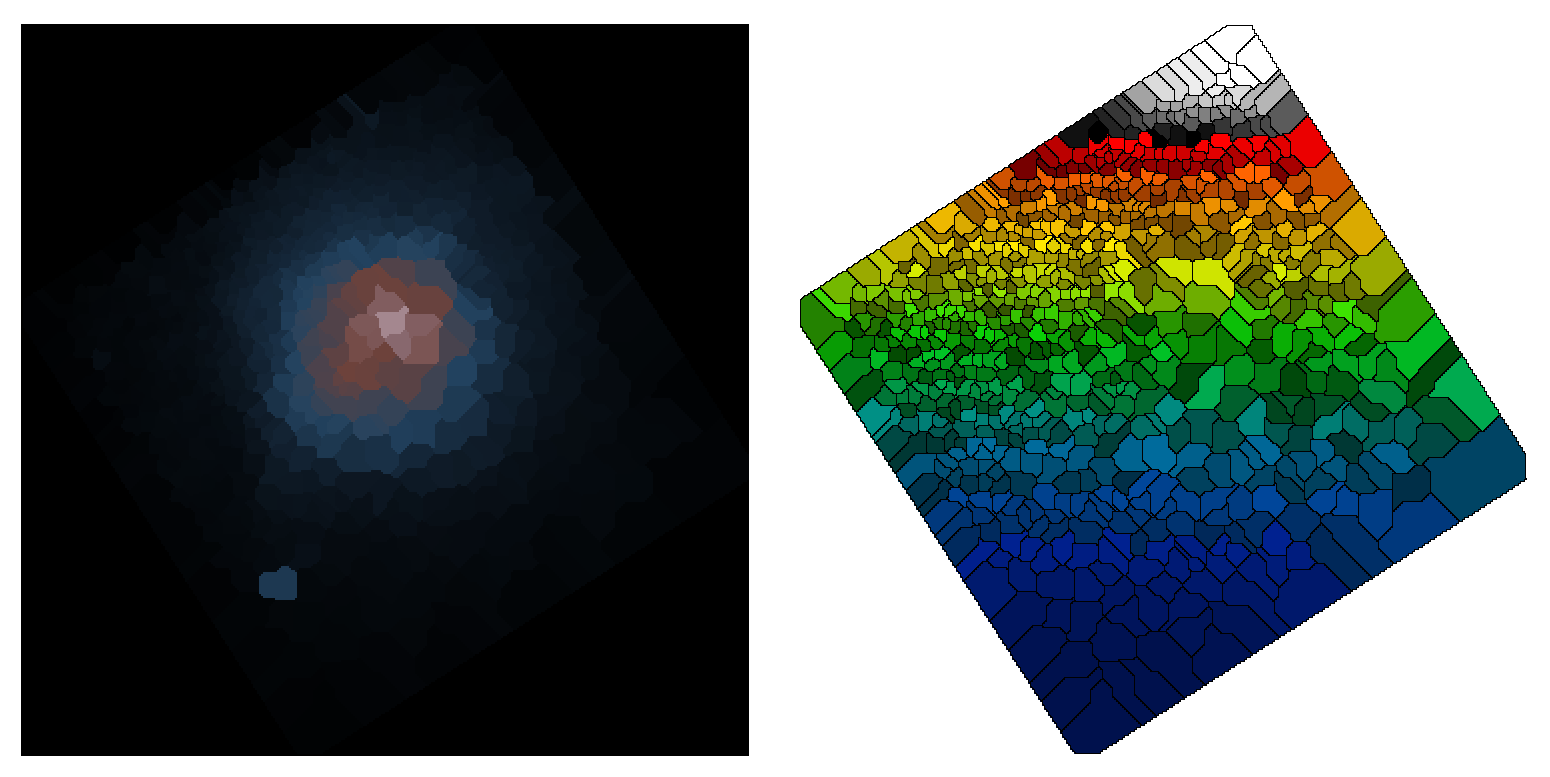

In [6]:
display_map watershed.img watershed.map watershed.png watershed.reg


The center of each of these _cells_ is a local maximum.  All pixels closest to the local maximum are grouped together.

> Note: this is the same as an unweighted Voronoi Tesselation